#### In this notebook different models will be use to predict multioutput :diameter, absrobance, and PL at once.
* Optimization will be run to find the optimized estimator, max_features, and random_state number 
* The skill of the model will be reported as an error in those predictions: 
    * MSE
    *MAE
    * R2

In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('dataset_CdSe_augmented_adjusted.csv')

In [4]:
input_col = ['Growth Temp (Celsius)', 'Metal_mmol (mmol)', 'Chalcogen_mmol (mmol)',
             'Amines_mmol (mmol)', 'CA_mmol (mmol)', 'Phosphines_mmol (mmol)', 
             'S_I_amount (g)', 'S_II_amount (g)', 'Time_min (min)', 
             'x0_cadmium acetate', 'x0_cadmium acetate dihydrate', 
             'x0_cadmium oxide', 'x0_cadmium stearate', 'x0_dimethylcadmium', 
             'x1_None', 'x1_benzoic acid', 'x1_dodecylphosphonic acid', 
             'x1_ethylphosphonic acid', 'x1_lauric acid', 
             'x1_myrstic acid', 'x1_oleic acid', 'x1_stearic acid',
             'x2_2-6-dimethylpyridine', 'x2_None', 'x2_aniline', 
             'x2_benzylamine', 'x2_dioctylamine/hexadecylamine',
             'x2_dodecylamine', 'x2_heptylamine', 'x2_hexadecylamine', 
             'x2_octadecylamine', 'x2_octylamine', 'x2_oleylamine', 
             'x2_pyridine', 'x2_trioctylamine', 'x3_None', 'x3_diphenylphosphine', 
             'x3_tributylphosphine', 'x3_trioctylphosphine', 
             'x3_triphenylphosphine', 'x4_None', 'x4_liquid parafin', 
             'x4_octadecene', 'x4_phenyl ether', 'x4_trioctylphosphine oxide', 
             'x5_None', 'x5_phosphinic acid', 'x5_trioctylphosphine oxide'
            ]

output_col = ['diameter_nm','abs_nm', 'emission_nm']

X = df[input_col]

y = df[output_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True)

In [5]:
y

,diameter_nm,abs_nm,emission_nm
0,3.41,566.000000,575.00
1,1.99,440.784362,497.00
2,2.13,461.024362,510.00
3,2.27,500.036190,517.00
4,2.53,500.036190,522.00
...,...,...,...
170,2.20,500.000000,535.50
171,2.80,545.000000,562.25
172,3.60,570.000000,590.35
173,1.70,450.000000,517.50


# Preliminary evaluatiopn of some regressions

Note: The MSE or r2 of the multiouput regression outcomes are the average of all MSE or r2 outputs. 

In [6]:
#This is used to roughly show which regression performs better.
# Testing Regressions:

REGRESSIONS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     
                                       random_state=44),
    "K-nn": KNeighborsRegressor(),                          
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(max_depth=4, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
            }
# r2 is used to evaluate the performance of all regressions.

r2_list = list()

for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, y_train)                 
    y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name, '\n')
    
# This loop will show r2 for each outcome
    for column in range(0, 3):
        r2 = r2_score(y_test.iloc[:, column], y_pred.iloc[:, column])
        r2_list.append(r2)
    
    print(' R^2 for diameter is ', r2_list[0], '\n',
          'R^2 for Absorbance is ', r2_list[1], '\n',
          'R^2 for PL is ', r2_list[2], '\n', '\n', 
         )
    del r2_list[:] #reset the list for the next regression

Extra trees 

 R^2 for diameter is  0.612141902073988 
 R^2 for Absorbance is  0.8425004109322505 
 R^2 for PL is  0.6860094588372774 
 

K-nn 

 R^2 for diameter is  0.3321375592600425 
 R^2 for Absorbance is  0.5461909791756889 
 R^2 for PL is  0.2554707040478098 
 

Linear regression 

 R^2 for diameter is  0.23458250135985848 
 R^2 for Absorbance is  0.5122078739835618 
 R^2 for PL is  0.19197079921701188 
 

Ridge 

 R^2 for diameter is  0.2948483615441141 
 R^2 for Absorbance is  0.5254482053479999 
 R^2 for PL is  0.21926042974716586 
 

Lasso 

 R^2 for diameter is  -0.052283966752188604 
 R^2 for Absorbance is  0.5595583386356775 
 R^2 for PL is  0.1989700014713628 
 

ElasticNet 

 R^2 for diameter is  0.005282626415747171 
 R^2 for Absorbance is  0.48608402579047416 
 R^2 for PL is  0.14707981309571172 
 

RandomForestRegressor 

 R^2 for diameter is  0.4379368005912442 
 R^2 for Absorbance is  0.7585249126480424 
 R^2 for PL is  0.5202175612257782 
 

Decision Tree Regresso

From the R2 values above, Extra Trees, Random Forest, Ridge, Decision Tree, and MultiO/P AdaB give the best predictions.

Now, we are going to optimize each of the the above regressions by grid searching the parameters

# Extra Trees

In [9]:
max_r2 = 0

max_i, max_j, max_k  = 0, 0, 0

for i in tqdm(range(1, 20)):
    for j in range(1, 10):
        for k in range(0, 80, 1):
            
            ET_reg = ExtraTreesRegressor(n_estimators=i,
                                         max_features=j,     
                                         random_state=k).fit(X_train, y_train)
            
            
            ET_y_pred = ET_reg.predict(X_test)
            
            ET_r2 = r2_score(y_test, pd.DataFrame(ET_y_pred))
            
            if (max_r2 < ET_r2):
                max_r2 = ET_r2
                max_i = i
                max_j = j
                max_k = k
            
print(max_r2, max_i, max_j, max_k)

100%|██████████| 19/19 [03:49<00:00, 12.08s/it]

0.7546816616641072 3 9 64


In [11]:
ET_reg = ExtraTreesRegressor(n_estimators=3,
                                         max_features=9,     
                                         random_state=64).fit(X_train, y_train)
            
            
ET_y_pred = ET_reg.predict(X_test)
            
ET_mae = mean_absolute_error(y_test, pd.DataFrame(ET_y_pred))

ET_mae

11.299910173650796

From the results above the parameters are applied to the model

In [14]:
ET_reg = ExtraTreesRegressor(n_estimators=3,
                            max_features=9,     
                            random_state=64).fit(X_train, y_train)
            
            
ET_y_pred = ET_reg.predict(X_test)

outputs = ('diameter: ', 'Abs: ', 'PL: ')

for i in range(0, 3):
    ET_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    ET_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE, '; MAE:', ET_MAE )


diameter:  r2: 0.661149102532149 ; MSE: 0.665204858063492 ; RMSE: 0.8156009183807311 ; MAE: 0.4028066666666667
Abs:  r2: 0.8524402729674878 ; MSE: 626.6385402172839 ; RMSE: 25.032749353942005 ; MAE: 18.814542901904765
PL:  r2: 0.7504556094926851 ; MSE: 424.17294444444457 ; RMSE: 20.595459316180463 ; MAE: 14.682380952380953


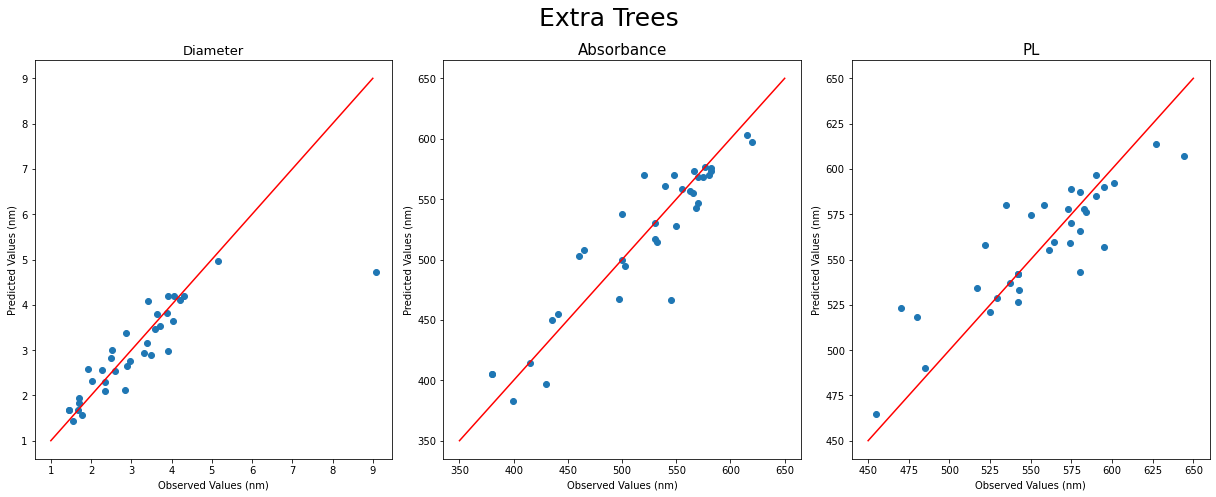

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Extra Trees', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(ET_y_pred).loc[:, 0],'o')
ax1.plot([1,9],[1,9], color = 'r')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


ax2.plot(y_test.iloc[:, 1], pd.DataFrame(ET_y_pred).loc[:, 1],'o')
ax2.plot([350,650],[350,650], color = 'r')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(ET_y_pred).loc[:, 2],'o')
ax3.plot([450,650],[450,650], color = 'r')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# Random Forest

In [10]:
max_r2 = 0

max_i, max_j, max_k, max_m  = 0, 0, 0, 0

for i in tqdm(range(5, 15)):
    for j in range(5, 20):
        for k in range(10, 20):
            for m in range (40, 46):
                RF_reg = RandomForestRegressor(max_depth=i, 
                                                n_estimators=j, 
                                                max_features=k,
                                                random_state=m).fit(X_train, y_train)

                RF_y_pred = RF_reg.predict(X_test)

                RF_r2 = r2_score(y_test, pd.DataFrame(RF_y_pred))

                if (max_r2 < RF_r2):
                    max_r2 = RF_r2
                    max_i = i
                    max_j = j
                    max_k = k
                    max_m = m
            
print(max_r2, max_i, max_j, max_k, max_m)

100%|██████████| 10/10 [03:29<00:00, 20.91s/it]

0.7283126622304739 8 5 12 44


From the results above (*take a long time to run*) the parameters are applied to the model

In [12]:
RF_reg = RandomForestRegressor(max_depth=13, 
                               n_estimators=5, 
                               max_features=14,
                               random_state=57).fit(X_train, y_train)
            
RF_y_pred = RF_reg.predict(X_test)

outputs = ('diameter: ', 'Abs : ', 'PL: ')
for i in range(0, 3):
    RF_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i])
    RF_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i])
    RF_RMSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i], squared=False)
    RF_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(RF_y_pred).loc[:, i])
    print(outputs[i], 'r2:', RF_r2, '; MSE:', RF_MSE, '; RMSE:', RF_RMSE, '; MAE:', RF_MAE)

diameter:  r2: 0.5192105832892588 ; MSE: 0.943847155464127 ; RMSE: 0.9715179645606802 ; MAE: 0.4596209523809523
Abs :  r2: 0.6907411050437697 ; MSE: 1313.322722817748 ; RMSE: 36.23979474028168 ; MAE: 25.487167615047625
PL:  r2: 0.5021456308167149 ; MSE: 846.247648571429 ; RMSE: 29.090335999631026 ; MAE: 19.623714285714286


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Random Forest', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(RF_y_pred).loc[:, 0],'o')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(RF_y_pred).loc[:, 1],'o')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(RF_y_pred).loc[:, 2],'o')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# Lasso

In [ ]:
min_r2 = 0

min_i, min_j, min_k, min_m  = 0, 0, 0, 0

for i in tqdm(np.arange(0.1, 2.0, 0.02)):
    for j in range(1, 100):
        L_reg = Lasso(alpha=i, random_state=j).fit(X_train, y_train)
        L_y_pred = L_reg.predict(X_test)
        L_r2 = r2_score(y_test, pd.DataFrame(L_y_pred))
      
        if (min_r2 < L_r2):
                min_r2 = L_r2
                min_i = i
                min_j = j

            
print(min_r2, min_i, min_j)

From the results above the parameters are applied to the model

In [38]:
L_reg = Lasso(alpha=0.1, random_state=1).fit(X_train, y_train)
            
L_y_pred = L_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    L_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(L_y_pred).loc[:, i])
    L_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(L_y_pred).loc[:, i])
    L_RMSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(L_y_pred).loc[:, i], squared=False)
    L_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(L_y_pred).loc[:, i])
    print(outputs[i], 'r2:', L_r2, '; MSE:', L_MSE, '; RMSE:', L_RMSE, '; MAE:', L_MAE )

diameter: r2: 0.2521760419982201 ; MSE: 1.9667981445460596 ; RMSE: 1.4024258071449127 ; MAE: 0.9221045406193107
Abs: r2: 0.5747460874430704 ; MSE: 2564.607989578328 ; RMSE: 50.641958784967315 ; MAE: 39.042108342977315
PL: r2: 0.4476449974079858 ; MSE: 1181.8208449095912 ; RMSE: 34.3776212805597 ; MAE: 26.39621109794444


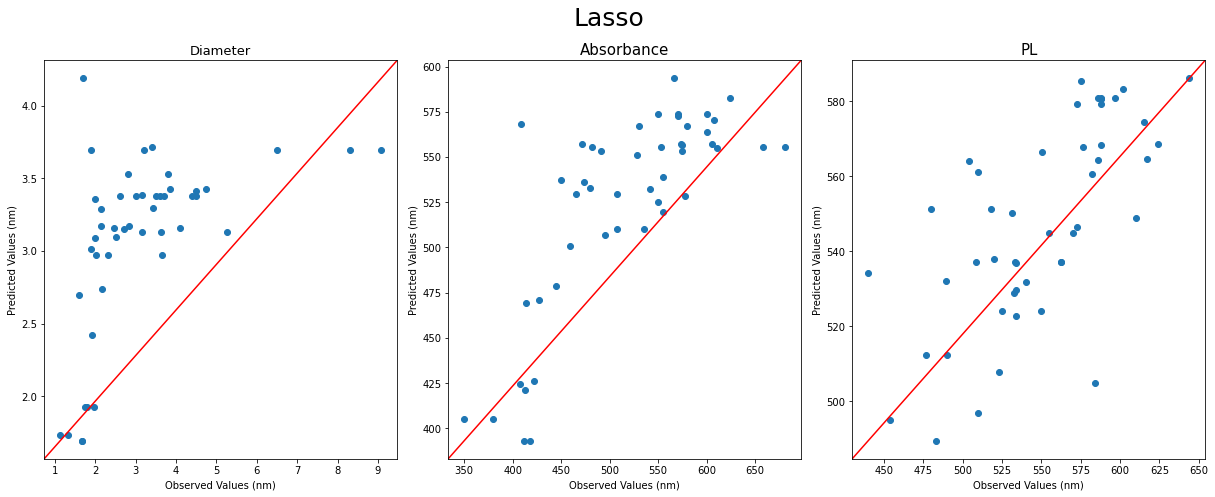

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Lasso', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(L_y_pred).loc[:, 0],'o')
ax1.plot([0,1],[0,1], transform=ax1.transAxes, color = 'r')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(L_y_pred).loc[:, 1],'o')
ax2.plot([0,1],[0,1], transform=ax2.transAxes, color = 'r')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(L_y_pred).loc[:, 2],'o')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# Decision Trees

In [13]:
max_r2 = 0

max_i, max_j, max_k, max_m  = 0, 0, 0, 0

for i in tqdm(range(5, 15)):
    for j in range(5, 15):
        for k in range(40, 60):
            for m in range (10, 50, 2):
                DT_reg = DecisionTreeRegressor(max_depth=i, 
                                               max_features=j,
                                               random_state=k, 
                                               max_leaf_nodes=m).fit(X_train, y_train)

                DT_y_pred = DT_reg.predict(X_test)

                DT_r2 = r2_score(y_test, pd.DataFrame(DT_y_pred))

                if (max_r2 < DT_r2):
                    max_r2 = DT_r2
                    max_i = i
                    max_j = j
                    max_k = k
                    max_m = m
            
print(max_r2, max_i, max_j, max_k, max_m)

100%|██████████| 10/10 [04:50<00:00, 29.09s/it]

0.7141608633182551 8 13 57 42


From the results above the parameters are applied to the model

In [39]:
DT_reg = DecisionTreeRegressor(max_depth=12, max_features=11, 
                      random_state=55, max_leaf_nodes=48).fit(X_train, y_train)

DT_y_pred = DT_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    DT_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(DT_y_pred).loc[:, i])
    DT_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(DT_y_pred).loc[:, i])
    DT_RMSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(DT_y_pred).loc[:, i], squared=False)
    DT_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(DT_y_pred).loc[:, i])
    print(outputs[i], 'r2:', DT_r2, '; MSE:', DT_MSE, '; RMSE:', DT_RMSE, '; MAE:', DT_MAE  )

diameter: r2: 0.6817126348319635 ; MSE: 0.8371047658297387 ; RMSE: 0.9149342959085853 ; MAE: 0.5296710638297872
Abs: r2: 0.8705969089841237 ; MSE: 780.400112252983 ; RMSE: 27.935642327553218 ; MAE: 22.740042983021702
PL: r2: 0.7282100418689819 ; MSE: 581.5228185660071 ; RMSE: 24.114784232209235 ; MAE: 15.875343093997431


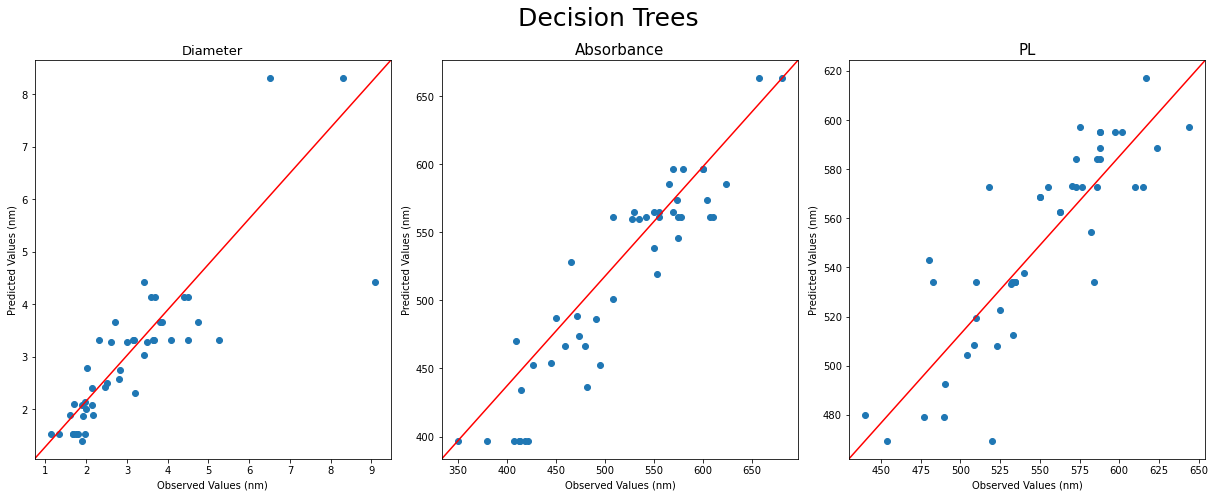

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Decision Trees', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(DT_y_pred).loc[:, 0],'o')
ax1.plot([0,1],[0,1], transform=ax1.transAxes, color = 'r')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(DT_y_pred).loc[:, 1],'o')
ax2.plot([0,1],[0,1], transform=ax2.transAxes, color = 'r')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(DT_y_pred).loc[:, 2],'o')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

# K Neighbors

In [20]:
max_r2 = 0

max_i = 0

max_j = 0

for i in tqdm(range(1, 30)):
    for j in range(1, 20):

        KNN_reg = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train, y_train)

        KNN_y_pred = KNN_reg.predict(X_test)

        KNN_r2 = r2_score(y_test, pd.DataFrame(KNN_y_pred))

        if (max_r2 < KNN_r2):
                max_r2 = KNN_r2
                max_i = i
                max_j = j

print(max_r2, max_i, max_j)

100%|██████████| 29/29 [00:08<00:00,  3.43it/s]

0.5910851701587229 2 1


From the results above the parameters are applied to the model

In [45]:
KNN_reg = KNeighborsRegressor(n_neighbors=2, 
                              p=4).fit(X_train, y_train)

KNN_y_pred = KNN_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    KNN_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(KNN_y_pred).loc[:, i])
    KNN_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(KNN_y_pred).loc[:, i])
    KNN_RMSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(KNN_y_pred).loc[:, i], squared=False)
    KNN_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(KNN_y_pred).loc[:, i])
    print(outputs[i], 'r2:', KNN_r2, '; MSE:', KNN_MSE, '; RMSE:', KNN_RMSE, '; MAE:', KNN_MAE)

diameter: r2: 0.7489402500096387 ; MSE: 0.660294237925532 ; RMSE: 0.8125849112096114 ; MAE: 0.4910904255319149
Abs: r2: 0.8015202037625659 ; MSE: 1196.9857446808512 ; RMSE: 34.597481767909805 ; MAE: 26.31276595744681
PL: r2: 0.6182237022039561 ; MSE: 816.8500053597587 ; RMSE: 28.58058791137367 ; MAE: 19.2864741606383


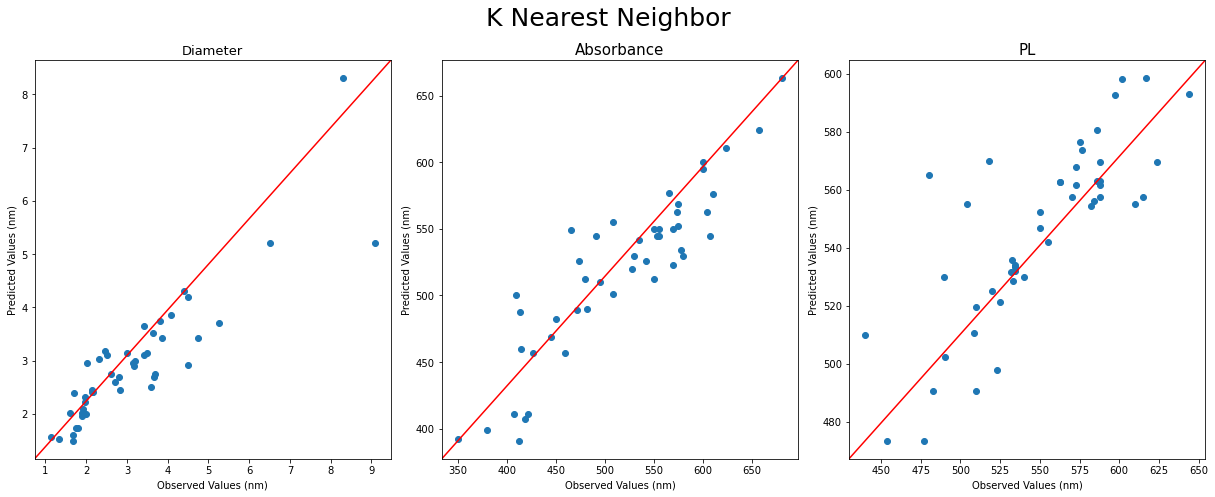

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('K Nearest Neighbor', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(KNN_y_pred).loc[:, 0],'o')
ax1.plot([0,1],[0,1], transform=ax1.transAxes, color = 'r')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(y_test.iloc[:, 1], pd.DataFrame(KNN_y_pred).loc[:, 1],'o')
ax2.plot([0,1],[0,1], transform=ax2.transAxes, color = 'r')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(KNN_y_pred).loc[:, 2],'o')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color = 'r')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

### Saving model Extra Trees

In [22]:
ET_regr = ExtraTreesRegressor(n_estimators=3,
                            max_features=9,     
                            random_state=64).fit(X_train, y_train)

ET_Y_pred = ET_regr.predict(X_test)

joblib.dump(ET_regr, "./model_CdSe_MO_ExtraTrees.joblib")

['./model_CdSe_MO_ExtraTrees.joblib']

### Analyzing

In [25]:
ET_regr = ExtraTreesRegressor(n_estimators=3,
                            max_features=9,     
                            random_state=64).fit(X_train, y_train)
            
ET_regr.fit(X_train, y_train)            
ET_Y_pred = ET_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MAE:', ET_MAE, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE )

diameter:  r2: 0.661149102532149 ; MAE: 0.4028066666666667 ; MSE: 0.665204858063492 ; RMSE: 0.8156009183807311
absorbance:  r2: 0.8524402729674878 ; MAE: 18.814542901904765 ; MSE: 626.6385402172839 ; RMSE: 25.032749353942005
emission:  r2: 0.7504556094926851 ; MAE: 14.682380952380953 ; MSE: 424.17294444444457 ; RMSE: 20.595459316180463


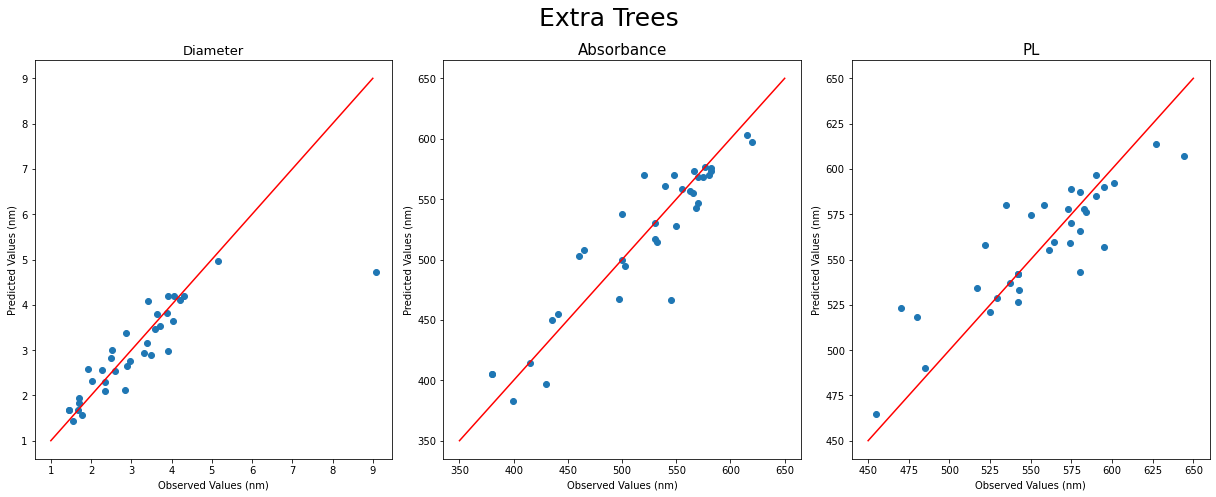

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,7))
fig.suptitle('Extra Trees', fontsize=25)

ax1.plot(y_test.iloc[:, 0], pd.DataFrame(ET_y_pred).loc[:, 0],'o')
ax1.plot([1,9],[1,9], color = 'r')
ax1.set_title('Diameter',fontsize=13)
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


ax2.plot(y_test.iloc[:, 1], pd.DataFrame(ET_y_pred).loc[:, 1],'o')
ax2.plot([350,650],[350,650], color = 'r')
ax2.set_title('Absorbance', fontsize=15)
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(y_test.iloc[:, 2], pd.DataFrame(ET_y_pred).loc[:, 2],'o')
ax3.plot([450,650],[450,650], color = 'r')
ax3.set_title('PL', fontsize=15)
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

In [30]:
importance_dict = dict()
for i in range(0,48):
    importance_dict[input_col[i]] = ET_regr.feature_importances_[i]

sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

top5 = DataFrame(sorted_importance[0:5], columns=['features', 'importance score'])

others = DataFrame(sorted_importance[5:], columns=['features', 'importance score'])

combined_others = pd.DataFrame(data = {
    'features' : ['others'],
    'importance score' : [others['importance score'].sum()]
})

#combining top 5 with others
imp_score = pd.concat([top5, combined_others])

sorted_importance


[('Time_min (min)', 0.28609121483274674),
 ('Chalcogen_mmol (mmol)', 0.15209633246510268),
 ('Growth Temp (Celsius)', 0.11644432702287573),
 ('x1_benzoic acid', 0.06869823656920955),
 ('x0_cadmium acetate', 0.04148151324966942),
 ('x2_hexadecylamine', 0.04128979160171229),
 ('Amines_mmol (mmol)', 0.027946607959592206),
 ('Metal_mmol (mmol)', 0.022890851181095174),
 ('S_I_amount (g)', 0.020610542039176897),
 ('x5_None', 0.01997755036550463),
 ('x1_oleic acid', 0.019483745415739512),
 ('x1_stearic acid', 0.018582504758111438),
 ('x4_trioctylphosphine oxide', 0.01808492437465163),
 ('x3_diphenylphosphine', 0.01583828189974497),
 ('Phosphines_mmol (mmol)', 0.015412958505481083),
 ('x3_None', 0.015374863513380086),
 ('x2_None', 0.015133424849370664),
 ('x3_tributylphosphine', 0.010659583580586498),
 ('x0_dimethylcadmium', 0.00924223387150463),
 ('x0_cadmium oxide', 0.00910738084504824),
 ('x3_trioctylphosphine', 0.009073115259371729),
 ('x0_cadmium acetate dihydrate', 0.0089522482934395),
 

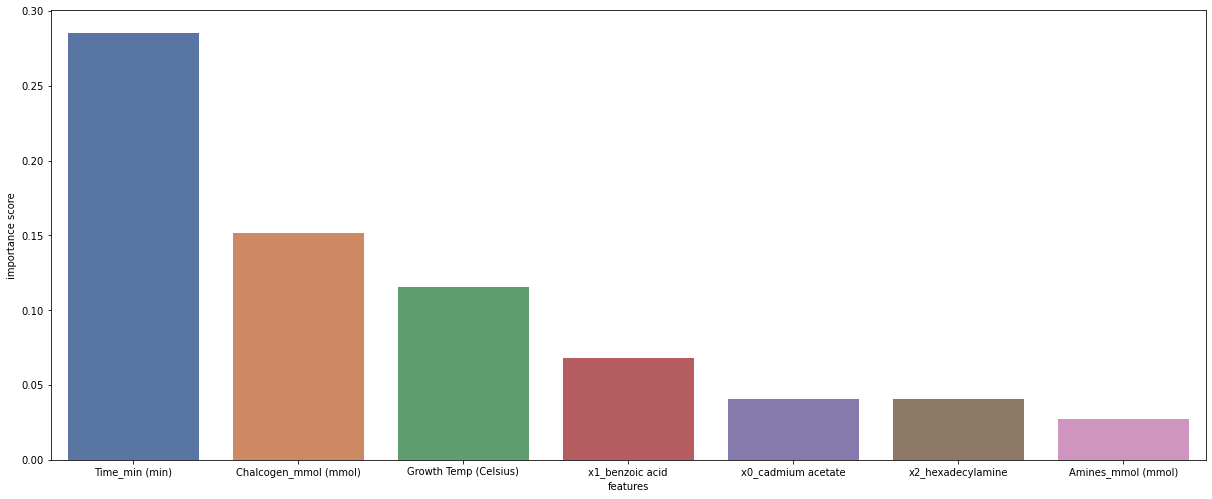

In [31]:
top7 = DataFrame(sorted_importance[0:7], columns=['features', 'importance score'])

others2 = DataFrame(sorted_importance[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7)